In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
def printmd(string):
    display(Markdown(string))

In [2]:
item_name = []
prices = []
links = []
name = input()
search = name.replace(" ", "+")

dolo 650


In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless') 
options.add_argument('start-maximized') 
options.add_argument('disable-infobars')
options.add_argument('--disable-extensions')
webdriver_path = "C:\\Users\\piyus\\Downloads\\chromedriver.exe"
driver = webdriver.Chrome(webdriver_path, options=options)

In [4]:
driver.get("https://www.netmeds.com/catalogsearch/result?q=" + search)
soup = BeautifulSoup(driver.page_source, 'html.parser')
printmd("__NETMEDS.COM__\n")
nm_name = soup.find("div", attrs = {'class': 'info'}).text.strip()
nm_price = soup.find("div", attrs = {'class': 'pricebox'}).text.strip().replace("Rs.", "₹ ")
nm_link = "Link: https://www.netmeds.com" + soup.find("div", attrs = {"class": "drug_c"}).a['href']
item_name.append(nm_name + "\n(Netmeds.com)")
prices.append(float(nm_price[2:]))
links.append(nm_link)
print("Name: " + nm_name)
print("Price: " + nm_price)
print(nm_link)

__NETMEDS.COM__


Name: Dolo 650mg Tablet 15'S
Price: ₹ 30.24
Link: https://www.netmeds.com/prescriptions/dolo-650mg-tablet-15-s


In [5]:
print("\n")

In [6]:
driver.get("https://www.1mg.com/search/all?name=" + search)
soup = BeautifulSoup(driver.page_source, 'html.parser')
printmd("__1MG.COM__\n")
mg_name = soup.find("span", attrs = {'class': 'style__pro-title___3zxNC'}).text.strip()
mg_price = soup.find("div", attrs = {'class': "style__price-tag___B2csA"}).text.strip().replace("MRP₹","₹ ")
if( mg_price[-3] != "." and mg_price[-2] != "."):
    mg_price  += ".00"
if(mg_price[-2] == "."):
    mg_price += "0"
mg_link = "Link: https://www.1mg.com" + soup.find("div", attrs = {"class": "style__horizontal-card___1Zwmt"}).a['href']
item_name.append(mg_name + "\n(1mg.com)")
prices.append(float(mg_price[2:]))
links.append(mg_link)
print("Name: " + mg_name)
print("Price: " + mg_price)
print(mg_link)

__1MG.COM__


Name: Dolo 650 Tablet
Price: ₹ 30.74
Link: https://www.1mg.com/drugs/dolo-650-tablet-74467


In [7]:
print("\n")

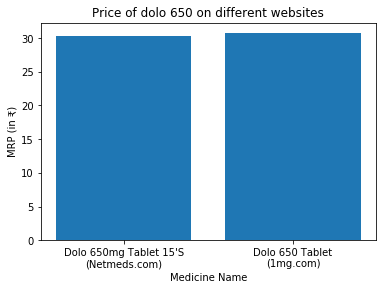

In [8]:
plt.bar(item_name, prices) 
plt.xlabel("Medicine Name") 
plt.ylabel("MRP (in ₹)") 
plt.title("Price of " + name + " on different websites") 
plt.show() 